# The Sparks Foundation - Data Science and Business Analytics Internship

Name   : Madhukar Kambli

TASK  : Prediction using Supervised ML

Aim    : Create the Decision Tree classifier and visualize it graphically

In [1]:
# Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
#Loading the csv file with pandas library
df=pd.read_csv(r'C:\Users\karan\Downloads\Iris.csv')

In [3]:
#To get first 10 rows
df.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#It will return shape/dimension of dataset
df.shape

(150, 6)

In [5]:
#used to print a concise summary of a DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
#used to view basic statistical details
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
#To check any null values

df.isnull().sum()                    #no null values found

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [8]:
#To check any null values

df.isnull().sum()                    #no null values found

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [9]:
# Removing unneccessary columns

df.drop(['Id'], axis=1, inplace=True)

In [10]:
df.head(5)                         # 'Id' column has been deleted

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

### Visualizing data

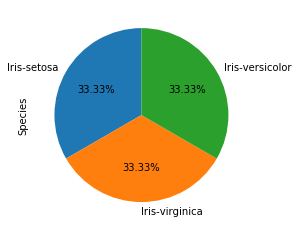

In [12]:
df['Species'].value_counts().plot.pie(startangle=90, autopct='%0.2f%%')

##### 1

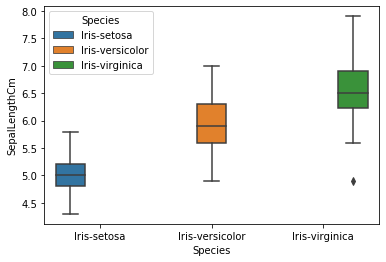

In [13]:
sns.boxplot(data=df, x='Species', y='SepalLengthCm', hue='Species')

From above diagram, we can see Sepal length of virginica is more than versicolor and setosa.
Sepal length of 'Setosa' is smallest among these three species.
And Sepal length of 'Versicolor' is less than 'verginica' & more than 'Setosa'

##### 2

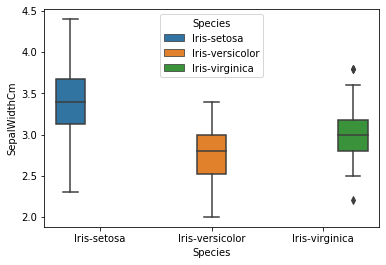

In [14]:
sns.boxplot(data=df, x='Species', y='SepalWidthCm', hue='Species')

From above diagram, we can say that, Sepal width of 'Setosa' is more than versicolor and Virginica.
Sepal width of 'Versicolor' is smallest among these three species.
And Sepal length of 'Viginiva' is less than 'Setosa', but almost equal to 'Versicolor'

##### 3

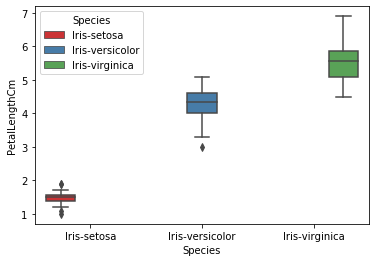

In [15]:
sns.boxplot(data=df, x='Species', y='PetalLengthCm', hue='Species', palette="Set1")

From this diagram, we can see 'Setosa' has smaller petal length, as compared to veersicolor & virginica.
Virginica's petal length is longest among these three species.

##### 5

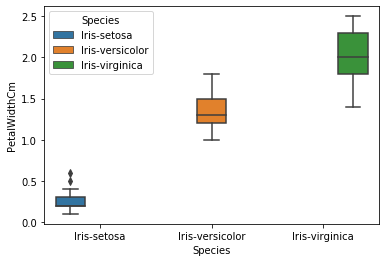

In [16]:
sns.boxplot(data=df, x='Species', y='PetalWidthCm', hue='Species')

From above diagram, we can observe that, setosa has smallest petal width as compared to other.
Petal width of 'Versicolor' is longer than Setosa, but smaller than Virginica.
And Petal width of 'Virginica' is longer than both 'Setosa' as well as 'Versicolor'

## Spliting data into dependant and independant variables

In [17]:
X=df.iloc[:,:4].values
y=df.iloc[:,4].values

In [18]:
print('shape of X: ',X.shape)
print('shape of y: ',y.shape)

shape of X:  (150, 4)
shape of y:  (150,)


# Spliting data into Training and Testing data

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [20]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('---------------------')
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (105, 4)
X_test:  (45, 4)
---------------------
y_train:  (105,)
y_test:  (45,)


# Model implementation & fitting data

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

DTC=DecisionTreeClassifier()
trained=DTC.fit(X_train, y_train)
trained

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

### Predicting the test dataset

In [22]:
y_pred=DTC.predict(X_test)
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

##### Comparing test data's output and predicted data's output

In [23]:
abc=pd.DataFrame({'actual':y_test, 'predicted':y_pred})
abc

,actual,predicted
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa
5,Iris-virginica,Iris-virginica
6,Iris-setosa,Iris-setosa
7,Iris-versicolor,Iris-versicolor
8,Iris-versicolor,Iris-versicolor
9,Iris-versicolor,Iris-versicolor


In [24]:
abc[abc['actual']!=abc['predicted']]

,actual,predicted
37,Iris-versicolor,Iris-virginica


[Text(223.2, 733.86, 'PetalWidthCm <= 0.75\nentropy = 0.664\nsamples = 105\nvalue = [34, 32, 39]\nclass = Iris-virginica'),
 Text(167.39999999999998, 570.78, 'entropy = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(279.0, 570.78, 'PetalLengthCm <= 4.95\nentropy = 0.495\nsamples = 71\nvalue = [0, 32, 39]\nclass = Iris-virginica'),
 Text(111.6, 407.70000000000005, 'PetalWidthCm <= 1.65\nentropy = 0.161\nsamples = 34\nvalue = [0, 31, 3]\nclass = Iris-versicolor'),
 Text(55.8, 244.62, 'entropy = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Iris-versicolor'),
 Text(167.39999999999998, 244.62, 'SepalWidthCm <= 3.1\nentropy = 0.375\nsamples = 4\nvalue = [0, 1, 3]\nclass = Iris-virginica'),
 Text(111.6, 81.54000000000008, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Iris-virginica'),
 Text(223.2, 81.54000000000008, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = Iris-versicolor'),
 Text(446.4, 407.70000000000005, 'PetalLengthCm <= 5.05\nentropy = 0.05

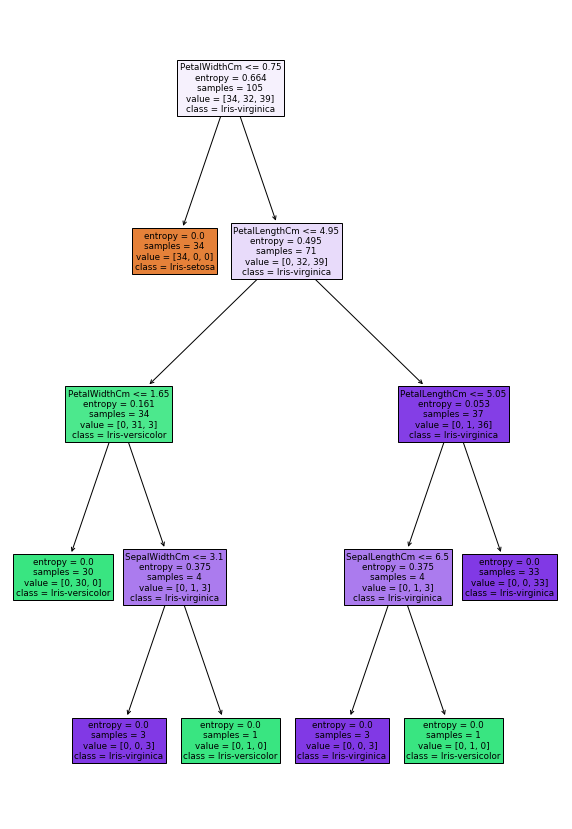

In [25]:
plt.figure(figsize=(10,15))
tree.plot_tree(trained, feature_names = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],
               class_names=['Iris-setosa','Iris-versicolor','Iris-virginica'], filled=True)

## Evaluating model:

In [26]:
#importing library for evaluation

from sklearn import metrics

print('accuracy: ',metrics.accuracy_score(y_test, y_pred))

accuracy:  0.9777777777777777


In [29]:
CM=metrics.confusion_matrix(y_test, y_pred)
CM

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]], dtype=int64)

### Visualizing confusion matrix

Text(0.5, 16.0, 'Predicted label')

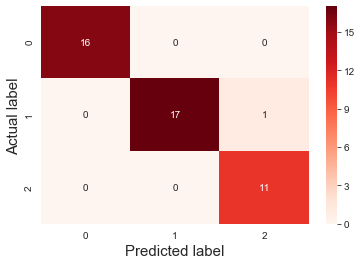

In [48]:
sns.heatmap(CM, annot=True, cmap='Reds')
plt.ylabel('Actual label', size=15)
plt.xlabel('Predicted label', size=15)

C:\Users\karan\Anaconda3.1\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


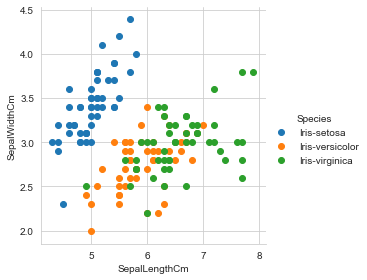

In [28]:
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="Species", size=4).map(plt.scatter, "SepalLengthCm", "SepalWidthCm").add_legend()
plt.show()